<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/00.%20Lab_Automobile_Scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros *relacionados* con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no.




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [1565]:
# Principales librerías
# Imports comunes
import pandas as pd
import numpy as np

# Cargar liberías gráficas
import seaborn as sns
import matplotlib.pyplot as plt


In [1566]:
# Cargar Data
pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()

<ipython-input-1566-2536d97d712a>:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pddf = pd.read_csv("Train_Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


Limpieza de algunos problemas en datos

In [1567]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [1568]:
print("La base de datos tiene:",len(pddf),"filas")
print("La base de datos tiene:",pddf.shape[1],"columnas")


La base de datos tiene: 121856 filas
La base de datos tiene: 40 columnas


In [1569]:
pddf.columns.tolist()

['ID',
 'Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Own_House_Age',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Occupation',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Application_Process_Day',
 'Application_Process_Hour',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_1',
 'Score_Source_2',
 'Score_Source_3',
 'Social_Circle_Default',
 'Phone_Change',
 'Credit_Bureau',
 'Default']

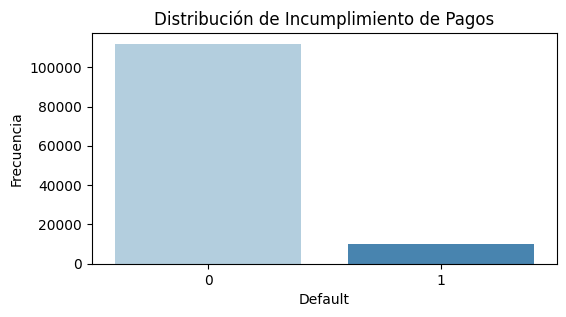

In [1570]:
# Analizando el target

# Crear una figura y especificar el tamaño
plt.figure(figsize=(6, 3))

# Crear el gráfico
sns.countplot(x='Default', data=pddf, palette='Blues')

# Agregar nombres a los ejes
plt.ylabel('Frecuencia')

# Agregar un título al gráfico
plt.title('Distribución de Incumplimiento de Pagos')

# Mostrar el gráfico
plt.show()

In [1571]:
print('La mora del universo es :', round(pddf.Default.mean(),4)*100,'%')

La mora del universo es : 8.08 %


In [1572]:
# Indentificar las variables
features = list(set(pddf.columns.tolist()) - set(['ID', 'ID_Days', 'Default']))

In [1573]:
features_string = list(pddf.select_dtypes(include=['object']).columns)
features_string

['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_3']

In [1574]:
%%capture
pddf.convert_dtypes(infer_objects=True).dtypes

In [1575]:
# Indentificar las variables categoricas
categorical_features = ['Accompany_Client', 'Client_Income_Type',
                        'Client_Education', 'Client_Marital_Status',
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag',
                        'Client_Contact_Work_Tag', 'Type_Organization',
                        'Workphone_Working', 'Mobile_Tag', 'Active_Loan', 'Bike_Owned',
                        'House_Own','Car_Owned', 'Child_Count', 'Client_Family_Members']

cols_to_rmv = ['Cleint_City_Rating', 'Homephone_Tag']

In [1576]:
# Indentificar las variables numéricas
numeric_features = list(set(features) - set(categorical_features + cols_to_rmv))


In [1577]:
def contar_valores_unicos(df):
    # Crear un DataFrame para almacenar los resultados
    resultados = pd.DataFrame(columns=['Variable', 'Valores Únicos'])

    # Iterar a través de las columnas del DataFrame
    for columna in df.columns:
        # Calcular la cantidad de valores únicos en la columna
        valores_unicos = df[columna].nunique()

        # Agregar los resultados a DataFrame
        resultados = resultados.append({'Variable': columna, 'Valores Únicos': valores_unicos}, ignore_index=True)

    return resultados

contar_valores_unicos(pddf[numeric_features])

<ipython-input-1577-6cde1dbda4d6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Variable': columna, 'Valores Únicos': valores_unicos}, ignore_index=True)
<ipython-input-1577-6cde1dbda4d6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Variable': columna, 'Valores Únicos': valores_unicos}, ignore_index=True)
<ipython-input-1577-6cde1dbda4d6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Variable': columna, 'Valores Únicos': valores_unicos}, ignore_index=True)
<ipython-input-1577-6cde1dbda4d6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

,Variable,Valores Únicos
0,Score_Source_2,67016
1,Application_Process_Hour,24
2,Registration_Days,19253
3,Credit_Bureau,21
4,Employed_Days,13219
5,Score_Source_3,1429
6,Phone_Change,3590
7,Age_Days,22582
8,Application_Process_Day,7
9,Score_Source_1,43968


In [1578]:
# convertir Series
for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])

## 3. Muestreo

In [1579]:
# Muestreo de data
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf,
                               stratify = pddf['Default'],
                               train_size = 0.8,
                               random_state = 123)


In [1580]:
print("El ratio de default en train es:",round(train.Default.mean(),2))

El ratio de default en train es: 0.08


In [1581]:
print("El ratio de default en test es:",round(test.Default.mean(),2))

El ratio de default en test es: 0.08


## 4. Tratamiento de variables numéricas




### Tratamiento de outliers

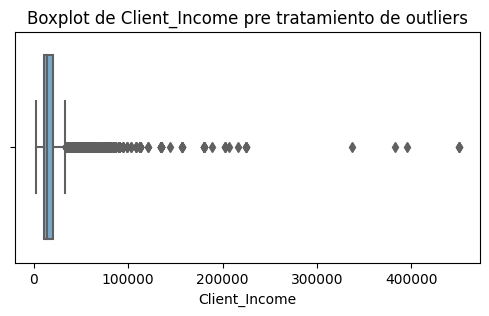

In [1582]:
# boxplot
plt.figure(figsize=(6, 3))  # Establecer el tamaño de la figura (opcional)
sns.boxplot(x="Client_Income", data=train, palette="Blues")

# Personalizar el título y etiquetas de los ejes
plt.title("Boxplot de Client_Income pre tratamiento de outliers")
plt.xlabel("Client_Income")

# Mostrar el boxplot
plt.show()

In [1583]:
Q1 = train[numeric_features].quantile(0.25)
Q3 = train[numeric_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [1584]:
# Reemplazar valores que estén fuera de los límites con NaN
train[numeric_features] = train[numeric_features].mask((train[numeric_features] < lower_bound) | (train[numeric_features] > upper_bound), None)
test[numeric_features]  = test[numeric_features].mask((test[numeric_features] < lower_bound) | (test[numeric_features] > upper_bound), None)


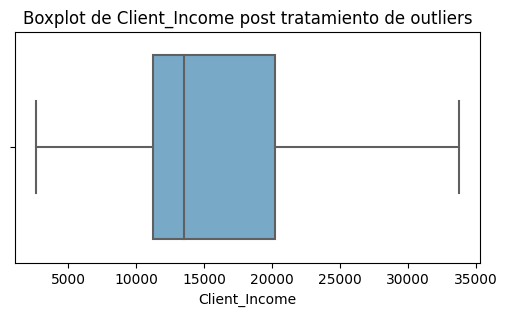

In [1585]:
# boxplot
plt.figure(figsize=(6, 3))  # Establecer el tamaño de la figura (opcional)
sns.boxplot(x="Client_Income", data=train, palette="Blues")

# Personalizar el título y etiquetas de los ejes
plt.title("Boxplot de Client_Income post tratamiento de outliers")
plt.xlabel("Client_Income")

# Mostrar el boxplot
plt.show()

### Tratamiento de missings

In [1586]:
# Imputación por mediana
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())
test[numeric_features]  = test[numeric_features].fillna(train[numeric_features].median())


In [1587]:
%%capture
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins = 5,
                               encode = 'ordinal',
                               strategy = "uniform", subsample = None).fit(train[numeric_features])

In [1588]:
# Aplicación
train[[x + '_cat' for x in numeric_features]] = discretizer.transform(train[numeric_features]).astype(int)
test[[x + '_cat' for x in numeric_features]] = discretizer.transform(test[numeric_features]).astype(int)


In [1589]:
position = 0
for column in discretizer.feature_names_in_:
  my_list = []
  for x in range(discretizer.n_bins_[position]):
    my_list.append(str(round(discretizer.bin_edges_[position][x], 2)) + ' a ' +
                  str(round(discretizer.bin_edges_[position][x+1], 2)))

  temp = pd.DataFrame({column + '_cat': range(0, discretizer.n_bins_[position]),
                       column + '_cat_desc' : my_list})
  temp[column + '_cat'] = temp[column + '_cat'].astype(int)
  train = pd.merge(train, temp, on = [column + '_cat'], how = 'left')
  test  = pd.merge(test,  temp, on = [column + '_cat'], how = 'left')
  position += 1


In [1590]:
train[['Score_Source_3_cat', 'Score_Source_3_cat_desc']].sort_values(by='Score_Source_3_cat').drop_duplicates().head(20)


,Score_Source_3_cat,Score_Source_3_cat_desc
20860,0,0.0 a 0.18
71074,1,0.18 a 0.36
53201,2,0.36 a 0.54
17839,3,0.54 a 0.72
5453,4,0.72 a 0.9


### Encoding de variables

Los métodos de encoding se utilizan en el procesamiento de datos y análisis de datos para transformar variables categóricas en una forma numérica que sea adecuada para su uso en algoritmos de aprendizaje automático y otros análisis estadísticos. Estos métodos son importantes porque muchos algoritmos de machine learning requieren que las variables de entrada sean numéricas, mientras que en la vida real, los datos pueden contener muchas variables categóricas o de texto.


---

<h3>Label Encoding</h3>

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" width="250" height="200">

---




<h3>One Hot Encoding</h3>

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" width="500" height="150">


---

<div style="text-align: center">Ejemplo de one hot Encoding </div>



<h3>Target Encoding</h3>

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" width="500" height="225">


 ---

<h3>Woe Encoding</h3>

El WOE encoding (Weight of Evidence Encoding) asigna un valor numérico a cada categoría de una variable categórica de tal manera que refleje la relación entre la categoría y la probabilidad de ocurrencia de un evento (como el incumplimiento de un préstamo o un evento de interés) en comparación con la probabilidad general del evento en todo el conjunto de datos. A menudo se utiliza en problemas en los que se desea evaluar la influencia de una variable categórica en la variable objetivo.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*yh1Ps_ynoc5DklDPZhxPWA.png" alt="HTML5 Icon" width="600" height="200">


 ---

### Aplicando WOE Encoding

In [1591]:
%%capture
!pip install category_encoders

In [1592]:
# Generando codificador Target Encoding
#from category_encoders.target_encoder import TargetEncoder
#encoder = TargetEncoder(min_samples_leaf=0, smoothing = 0)

from category_encoders.woe import WOEEncoder

encoder = WOEEncoder()
encoder.fit(train[[x + '_cat_desc' for x in numeric_features]], train.Default)


WOEEncoder(cols=['Score_Source_2_cat_desc', 'Application_Process_Hour_cat_desc',
                 'Registration_Days_cat_desc', 'Credit_Bureau_cat_desc',
                 'Employed_Days_cat_desc', 'Score_Source_3_cat_desc',
                 'Phone_Change_cat_desc', 'Age_Days_cat_desc',
                 'Application_Process_Day_cat_desc', 'Score_Source_1_cat_desc',
                 'Social_Circle_Default_cat_desc', 'Credit_Amount_cat_desc',
                 'Loan_Annuity_cat_desc', 'Client_Income_cat_desc',
                 'Own_House_Age_cat_desc',
                 'Population_Region_Relative_cat_desc'])

In [1593]:
# Tratamiento por WOE Encoding
train[[x + '_woe' for x in numeric_features]] = encoder.transform(train[[x + '_cat_desc' for x in numeric_features]])
test[[x + '_woe' for x in numeric_features]] = encoder.transform(test[[x + '_cat_desc' for x in numeric_features]])


In [1594]:
df_resume = train.\
            groupby(['Client_Income_cat', 'Client_Income_cat_desc']).agg({'ID':'count',
                                              'Client_Income' : 'median',
                                              'Client_Income_woe' : 'mean',
                                              'Default' : 'sum'}).reset_index()

df_resume

,Client_Income_cat,Client_Income_cat_desc,ID,Client_Income,Client_Income_woe,Default
0,0,2610.0 a 8838.0,10835,6750.0,0.016363,888
1,1,8838.0 a 15066.0,44219,12150.0,0.032288,3680
2,2,15066.0 a 21294.0,25375,18000.0,0.044410,2135
3,3,21294.0 a 27522.0,12985,22500.0,-0.138959,922
4,4,27522.0 a 33750.0,4070,31500.0,-0.287184,251


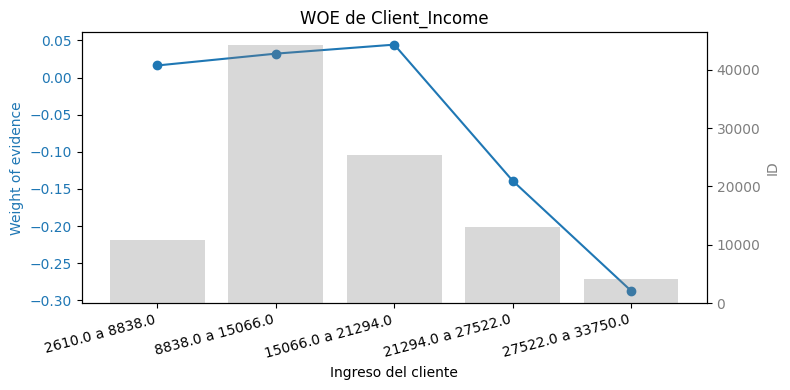

In [1595]:
# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(8, 4))

# Configurar el primer eje (eje principal) para Client_Income_woe vs Client_Income
ax1.set_xlabel('Ingreso del cliente')
ax1.set_ylabel('Weight of evidence', color='tab:blue')
ax1.plot(df_resume.Client_Income_cat_desc, df_resume.Client_Income_woe, marker='o', linestyle='-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Configurar el segundo eje (eje secundario) para las barras de ID
ax2 = ax1.twinx()
ax2.bar(df_resume.Client_Income_cat_desc, df_resume.ID, alpha=0.3, color='tab:gray')
ax2.set_ylabel('ID', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Rotar manualmente las etiquetas del eje x
x_labels = df_resume.Client_Income_cat_desc
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=15, ha="right")

# Mostrar el gráfico
plt.title('WOE de Client_Income')
plt.tight_layout()  # Para evitar que las etiquetas se superpongan
plt.show()

## 5. Tratamiento de variables categóricas

In [1596]:
# Imputación de missings
train[categorical_features] = train[categorical_features].fillna('MISSING')
test[categorical_features] = test[categorical_features].fillna('MISSING')

In [1597]:
# convertir Series
train[categorical_features] = train[categorical_features].astype('category')
test[categorical_features] = test[categorical_features].astype('category')


In [1598]:
# Configurando Encoder
encoder = WOEEncoder()
encoder.fit(train[categorical_features], train.Default)

WOEEncoder(cols=['Accompany_Client', 'Client_Income_Type', 'Client_Education',
                 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
                 'Client_Housing_Type', 'Client_Occupation',
                 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
                 'Type_Organization', 'Workphone_Working', 'Mobile_Tag',
                 'Active_Loan', 'Bike_Owned', 'House_Own', 'Car_Owned',
                 'Child_Count', 'Client_Family_Members'])

In [1599]:
# Tratamiento por WOE Encoding
train[[x + '_woe' for x in categorical_features]] = encoder.transform(train[categorical_features])
test[[x + '_woe' for x in categorical_features]] = encoder.transform(test[categorical_features])


In [1600]:
df_resume = train.\
            groupby('Client_Marital_Status').agg({'ID':'count',
                                              'Client_Marital_Status_woe' : 'mean',
                                              'Default' : 'sum'}).reset_index().sort_values(by = 'Client_Marital_Status_woe')

df_resume

,Client_Marital_Status,ID,Client_Marital_Status_woe,Default
4,W,4894,-0.266247,308
2,MISSING,2731,-0.075519,205
0,D,6075,-0.056906,465
1,M,69916,-0.022561,5533
3,S,13868,0.217231,1365


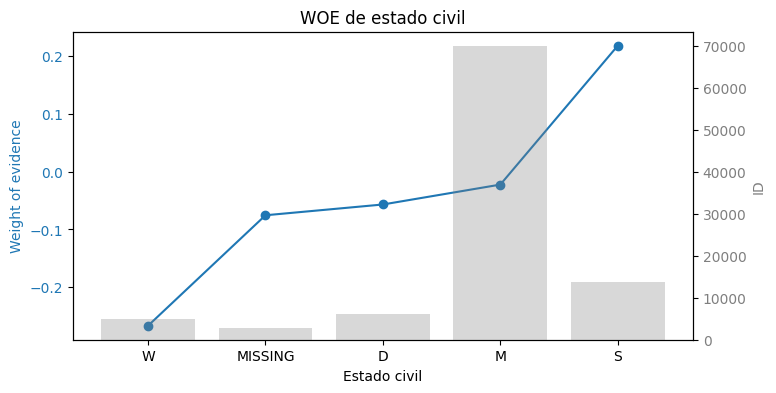

In [1601]:
# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(8, 4))

# Configurar el primer eje (eje principal) para Client_Income_woe vs Client_Income
ax1.set_xlabel('Estado civil')
ax1.set_ylabel('Weight of evidence', color='tab:blue')
ax1.plot(df_resume.Client_Marital_Status, df_resume.Client_Marital_Status_woe, marker='o', linestyle='-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Configurar el segundo eje (eje secundario) para las barras de ID
ax2 = ax1.twinx()
ax2.bar(df_resume.Client_Marital_Status, df_resume.ID, alpha=0.3, color='tab:gray')
ax2.set_ylabel('ID', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Mostrar el gráfico
plt.title('WOE de estado civil')
plt.show()

## 6. Preselección de variables

Ahora tenemos muchas variables listas para trabajar, sin embargo los modelos de scorecard tradicionales no pueden utilizar tantas variables. Por esta razón debemos de seleccionar las características más importantes mediante alguna métrica.

<b>Information Value<b/>

El Information Value (IV) es una métrica utilizada en el análisis de riesgos. Su objetivo principal es medir la importancia predictiva de una variable en relación con una variable objetivo binaria.


<img src="https://www.k2analytics.co.in/wp-content/uploads/2014/08/table.png" alt="HTML5 Icon" width="400" height="200">


In [1602]:
import pandas as pd
import numpy as np
from math import log

def calculate_information_value(df, feature, target):
    """
    Calcula el Information Value (IV) para una variable categórica en relación con una variable objetivo binaria.

    Args:
        df (DataFrame): El DataFrame que contiene los datos.
        feature (str): El nombre de la variable categórica.
        target (str): El nombre de la variable objetivo binaria.

    Returns:
        float: El valor del IV calculado.
    """
    # Verificar que la variable objetivo sea binaria
    if len(df[target].unique()) != 2:
        raise ValueError("La variable objetivo debe ser binaria (2 categorías).")

    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df[feature], df[target])

    # Agregar una pequeña constante a los denominadores para evitar divisiones por cero
    epsilon = 1e-6
    contingency_table['rd'] = contingency_table[1] / (contingency_table[1] + contingency_table[0] + epsilon)

    contingency_table['event_rate'] = (contingency_table[1]) / (contingency_table[1].sum() + epsilon)
    contingency_table['non_event_rate'] = (contingency_table[0]) / (contingency_table[0].sum() + epsilon)

    # Calcular el WOE (Weight of Evidence)
    contingency_table['woe'] = np.log(contingency_table['event_rate'] / (contingency_table['non_event_rate'] + epsilon) + epsilon)

    # Calcular el Information Value (IV)
    contingency_table['iv'] = (contingency_table['event_rate'] - contingency_table['non_event_rate']) * contingency_table['woe']
    iv = contingency_table.iv.sum()

    # Mostrar el resultado
    return round(iv, 4)

In [1603]:
calculate_information_value(train, 'Score_Source_3_cat', 'Default')

0.281

In [1604]:
describe = pd.DataFrame({'feature': [x + '_cat' for x in numeric_features] +
                                    categorical_features,
                         'iv' : [calculate_information_value(train, x + '_cat', 'Default') for x in numeric_features] +
                                [calculate_information_value(train, x, 'Default') for x in categorical_features]})

describe = describe.sort_values(by = 'iv', ascending = False)
describe

<ipython-input-1602-93b693980f38>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(df[feature], df[target])


,feature,iv
5,Score_Source_3_cat,0.2810
0,Score_Source_2_cat,0.2620
9,Score_Source_1_cat,0.1286
23,Client_Occupation,0.0774
26,Type_Organization,0.0766
18,Client_Education,0.0698
7,Age_Days_cat,0.0689
17,Client_Income_Type,0.0502
6,Phone_Change_cat,0.0439
4,Employed_Days_cat,0.0405


In [1605]:
describe[describe.iv > 0.05]

,feature,iv
5,Score_Source_3_cat,0.2810
0,Score_Source_2_cat,0.2620
9,Score_Source_1_cat,0.1286
23,Client_Occupation,0.0774
26,Type_Organization,0.0766
18,Client_Education,0.0698
7,Age_Days_cat,0.0689
17,Client_Income_Type,0.0502


## 7. ScoreCard

In [1606]:
scorecard_features = ['Score_Source_3_cat', 'Age_Days_cat', 'Client_Education', 'Client_Income_cat']

train[scorecard_features].drop_duplicates()

,Score_Source_3_cat,Age_Days_cat,Client_Education,Client_Income_cat
0,3,1,MISSING,2
1,0,0,Graduation,1
2,0,2,Secondary,1
3,3,1,Graduation,1
4,4,0,Secondary,1
...,...,...,...,...
93555,1,0,Post Grad,3
93850,1,3,Junior secondary,3
94909,4,0,Graduation dropout,4
96103,4,0,Junior secondary,4


In [1607]:
factor = - 100

score_points_1 = train[['Score_Source_3_cat_desc', 'Score_Source_3_cat', 'Score_Source_3_woe']].sort_values(by='Score_Source_3_cat').drop_duplicates()
score_points_1['scorepoints_1'] = round(score_points_1.Score_Source_3_woe*factor, 0)
score_points_1['scorepoints_adj_1'] = [- 120, - 55, - 5, +55, +90]

score_points_1


,Score_Source_3_cat_desc,Score_Source_3_cat,Score_Source_3_woe,scorepoints_1,scorepoints_adj_1
20860,0.0 a 0.18,0,1.159735,-116.0,-120
71074,0.18 a 0.36,1,0.515047,-52.0,-55
53201,0.36 a 0.54,2,0.031027,-3.0,-5
17839,0.54 a 0.72,3,-0.534017,53.0,55
5453,0.72 a 0.9,4,-0.904989,90.0,90


In [1608]:
score_points_2 = train[['Age_Days_cat_desc', 'Age_Days_cat', 'Age_Days_woe']].sort_values(by='Age_Days_cat').drop_duplicates()
score_points_2['scorepoints_2'] = round(score_points_2.Age_Days_woe*factor, 0)
score_points_2['scorepoints_adj_2'] = [-40, -20, 5, 25, 55]
score_points_2


,Age_Days_cat_desc,Age_Days_cat,Age_Days_woe,scorepoints_2,scorepoints_adj_2
48741,7676.0 a 11181.0,0,0.333930,-33.0,-40
53402,11181.0 a 14686.0,1,0.183616,-18.0,-20
11327,14686.0 a 18191.0,2,-0.051396,5.0,5
13816,18191.0 a 21696.0,3,-0.234466,23.0,25
92986,21696.0 a 25201.0,4,-0.533586,53.0,55


In [1609]:
score_points_3 = train[['Client_Education', 'Client_Education_woe']].sort_values(by='Client_Education_woe').drop_duplicates()
score_points_3['scorepoints_3'] = round(score_points_3.Client_Education_woe*factor, 0)
score_points_3['scorepoints_adj_3'] = [165, 50, 10, 0, -15, -30]
score_points_3


,Client_Education,Client_Education_woe,scorepoints_3,scorepoints_adj_3
86282,Post Grad,-1.629050,163.0,165
15552,Graduation,-0.494980,49.0,50
31041,MISSING,-0.098770,10.0,10
80441,Graduation dropout,0.004110,-0.0,0
9361,Secondary,0.129937,-13.0,-15
63233,Junior secondary,0.306379,-31.0,-30


In [1610]:
score_points_4 = train[['Client_Income_cat_desc', 'Client_Income_cat', 'Client_Income_woe']].sort_values(by='Client_Income_cat').drop_duplicates()
score_points_4['scorepoints_4'] = round(score_points_4.Client_Income_woe*factor, 0)
score_points_4['scorepoints_adj_4'] = [-10, -5, 0, 15, 30]
score_points_4


,Client_Income_cat_desc,Client_Income_cat,Client_Income_woe,scorepoints_4,scorepoints_adj_4
48741,2610.0 a 8838.0,0,0.016363,-2.0,-10
40103,8838.0 a 15066.0,1,0.032288,-3.0,-5
80025,15066.0 a 21294.0,2,0.044410,-4.0,0
12809,21294.0 a 27522.0,3,-0.138959,14.0,15
79437,27522.0 a 33750.0,4,-0.287184,29.0,30


In [1611]:

train = pd.merge(train, score_points_1, on = ['Score_Source_3_cat_desc', 'Score_Source_3_cat', 'Score_Source_3_woe'], how = 'left')
test =  pd.merge(test,  score_points_1, on = ['Score_Source_3_cat_desc', 'Score_Source_3_cat', 'Score_Source_3_woe'], how = 'left')

train = pd.merge(train, score_points_2, on = ['Age_Days_cat_desc', 'Age_Days_cat', 'Age_Days_woe'], how = 'left')
test  = pd.merge(test,  score_points_2, on = ['Age_Days_cat_desc', 'Age_Days_cat', 'Age_Days_woe'], how = 'left')

train = pd.merge(train, score_points_3, on = ['Client_Education', 'Client_Education_woe'], how = 'left')
test  = pd.merge(test,  score_points_3, on = ['Client_Education', 'Client_Education_woe'], how = 'left')

train = pd.merge(train, score_points_4, on = ['Client_Income_cat_desc', 'Client_Income_cat', 'Client_Income_woe'], how = 'left')
test  = pd.merge(test,  score_points_4, on = ['Client_Income_cat_desc', 'Client_Income_cat', 'Client_Income_woe'], how = 'left')



In [1621]:
offset = 300

train['scorecard'] = train.scorepoints_adj_1 + train.scorepoints_adj_2 + train.scorepoints_adj_3 + train.scorepoints_adj_4 + offset
test['scorecard']  =  test.scorepoints_adj_1 +  test.scorepoints_adj_2 +  test.scorepoints_adj_3 +  test.scorepoints_adj_4 + offset


In [1622]:
print(train.scorecard.min(), train.scorecard.max())

105 640


In [1614]:
test.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Family_Members_woe,scorepoints_1,scorepoints_adj_1,scorepoints_2,scorepoints_adj_2,scorepoints_3,scorepoints_adj_3,scorepoints_4,scorepoints_adj_4,scorecard
0,12176916,15750.0,0.0,1.0,MISSING,1.0,MISSING,50690.25,5545.80,Relative,...,-0.069427,53.0,55,5.0,5,-13.0,-15,-4.0,0,45
1,12134687,6750.0,0.0,MISSING,0.0,1.0,0.0,19782.00,1598.85,Alone,...,-0.069427,-3.0,-5,-33.0,-40,-13.0,-15,-2.0,-10,-70
2,12132658,11250.0,0.0,1.0,MISSING,1.0,0.0,13500.00,675.00,Alone,...,0.041536,90.0,90,5.0,5,-13.0,-15,-3.0,-5,75
3,12188075,29250.0,1.0,0.0,1.0,0.0,1.0,54504.00,2553.75,Alone,...,0.074987,53.0,55,-18.0,-20,49.0,50,29.0,30,115
4,12196075,18000.0,0.0,0.0,0.0,1.0,0.0,37692.00,1937.25,Alone,...,0.041536,-3.0,-5,5.0,5,-13.0,-15,-4.0,0,-15


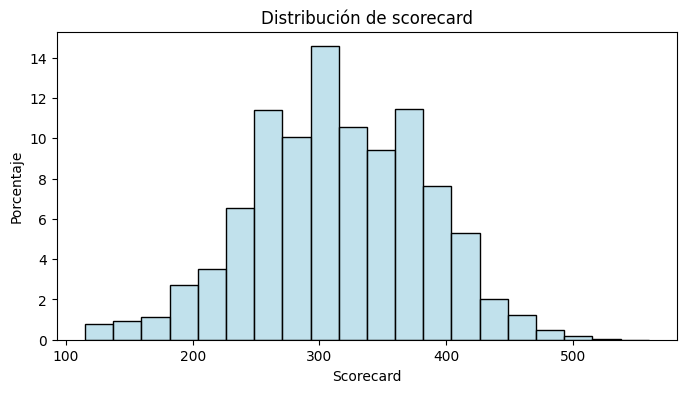

In [1623]:
# Crear el histograma
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico
sns.histplot(test.scorecard, bins=20, kde=False, color='lightblue', stat="percent")

# Personalizar el gráfico
plt.title('Distribución de scorecard')
plt.xlabel('Scorecard')
plt.ylabel('Porcentaje')
plt.grid(axis='y', linestyle='', alpha=0.7)

# Mostrar el gráfico
plt.show()

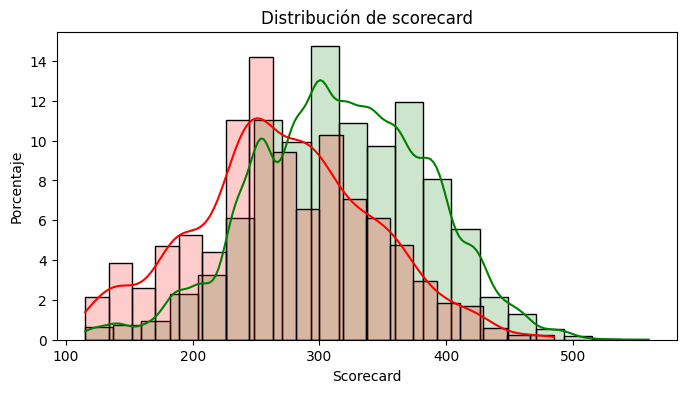

In [1625]:
# Crear el histograma
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico
sns.histplot(data = test[test.Default == 0], x = 'scorecard', bins=20, kde=True, color='green', stat="percent", alpha = 0.2)
sns.histplot(data = test[test.Default == 1], x = 'scorecard', bins=20, kde=True, color='red', stat="percent", alpha = 0.2)

# Personalizar el gráfico
plt.title('Distribución de scorecard')
plt.xlabel('Scorecard')
plt.ylabel('Porcentaje')
plt.grid(axis='y', linestyle='', alpha=0.7)

# Mostrar el gráfico
plt.show()

---
## Gracias por completar este laboratorio!